# Techniques

*   Google Colab
*   Selenium (Python Bindings)

# Google Colab Note


*   The **'maximum lifetime'** of a running notebook is **12 hours** (browser open)

*   An **'Idle'** notebook instance cuts-off after **90 minutes**

*   You can have a maximum of **2 notebooks** running concurrently

*   If you close the notebook window and open it while the instance is still running, the cell outputs and variables will still persist. However if the notebook instance has been recycled, your cell outputs and variables will no longer be available.



# Prerequisites

In [ ]:
! pip install selenium  # test version == 4.1.0
! apt-get update 
! apt install chromium-chromedriver

# Import

In [6]:
import os
import pytz
import time
from time import sleep
import datetime
import selenium
from selenium import webdriver
import cv2
from google.colab.patches import cv2_imshow

# Set up webdriver

In [4]:
def setup_driver():
    # Add some common options to avoid Chrome crash
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    return webdriver.Chrome('chromedriver',chrome_options=chrome_options)

driver = setup_driver()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


# Main

/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webdriver.py:1316: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  "type. It should end with a `.png` extension", UserWarning)


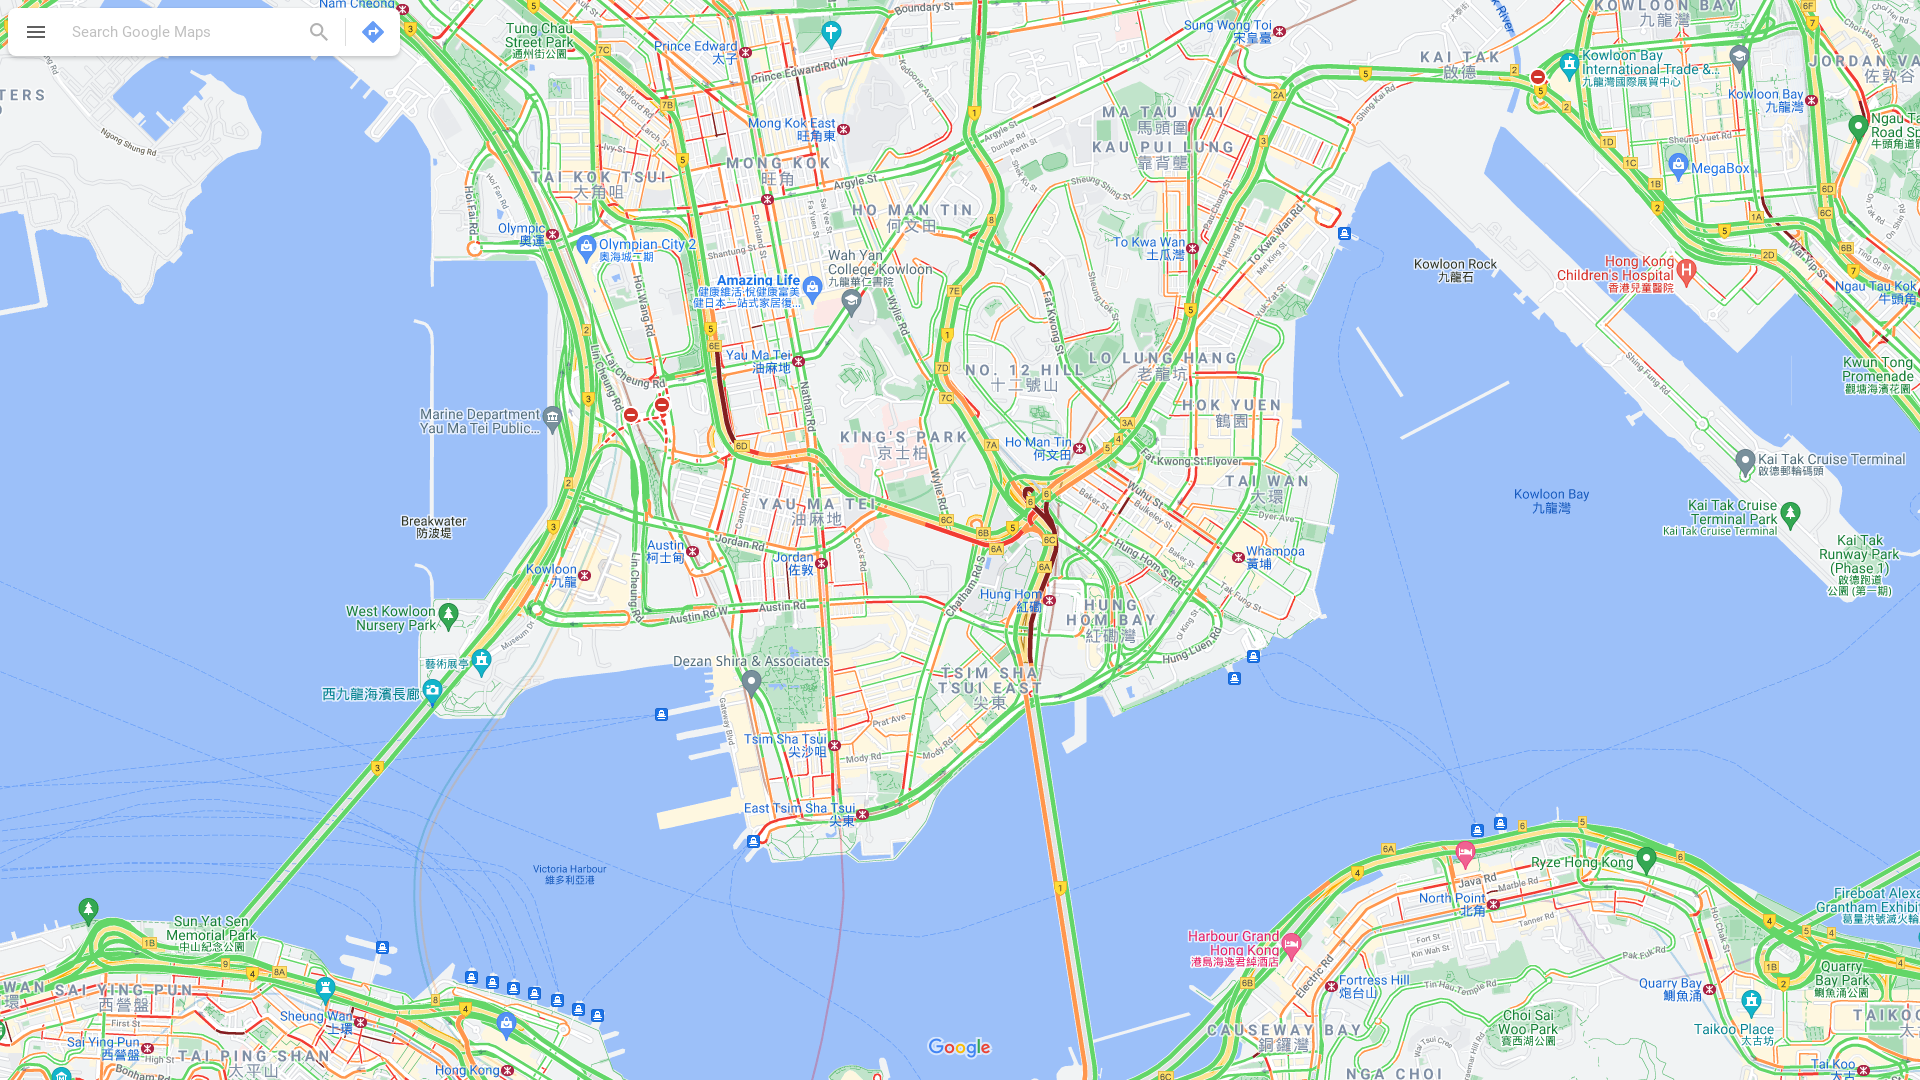

In [8]:
def get_timestamp():
    return datetime.datetime.fromtimestamp(int(time.time()), pytz.timezone('Asia/Shanghai')).strftime('%Y-%m-%d %H:%M:%S')


URL = "https://www.google.com.hk/maps/@22.3057228,114.1776167,15.38z/data=!5m1!1e1?hl=en"

driver.get(URL)
driver.set_window_size(1920, 1080)

sleep(0.5)

screenshot_path = './{}.jpg'.format(get_timestamp())

driver.save_screenshot(screenshot_path)

img = cv2.imread(screenshot_path)
cv2_imshow(img)
